# Машинное обучение, DS-поток
## Задание ML.6


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 60 баллов;
* Задача 2 &mdash; 120 баллов;
* Задача 3 &mdash; 20 баллов + бонусы до 30 баллов.

In [1]:
# Bot check

# HW_ID: ds_ml6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3, palette="Set2")

---
### Задача 1

В модели XGBoost запишите задачу оптимизации при построении нового дерева, критерий информативности и оптимальные ответы в листьях в следующих случаях.
1. Задача регрессии, квадратичная функция потерь $L(y, z) = (y - z)^2$.
2. Задача классификации, экспоненциальная функция потерь $L(y, z) = e^{-yz}$.
3. Задача классификации, логистическая функция потерь $L(y, z) = \ln(1 + e^{-yz})$.

В задачах классификации классификатор предсказывает степень уверенности принадлежности классу из $\mathscr{Y} \in \{-1, +1\}$. Решающее правило имеет вид $f(x) = \mathrm{sign} \widehat{y}(x)$.

Определим $g_i = \nabla_s L(Y_i, s_i)$, $h_i = \nabla_s^2 L(Y_i, s_i)$

В общем случае задача оптимизации имеет вид:

$$
\sum\limits_{i=0}^{n} \left[ \Delta s_i \nabla_s L(Y_i, s_i)  + \frac{1}{2} \Delta s_i^2 \nabla_s^2 L(Y_i, s_i) \right] \rightarrow \arg \min_{\Delta s \in R^n}
$$


Критерий информативности:

$$
H(X) = -\frac{1}{2} \left(\sum\limits_{i \in X} g_i \right)^2 / \left(\sum\limits_{i \in X}h_i + \lambda \right) + \mu
$$

Оптимальные ответы в листьях:
$$
\gamma_k^* = - \frac{\sum\limits_{i \in R_k} g_i}{\sum\limits_{i \in R_k} h_i + \lambda}
$$




**1.** $L(y, z) = (y - z)^2$

$g_i = \nabla (Y_i - s_i)^2 = 2(s_i - Y_i)$

$h_i = \nabla^2 (Y_i - s_i)^2 = 2$

Значит в итоге имеем:

Задача оптимизации:

$$
\sum\limits_{i=0}^{n} \left[ 2\Delta s_i (s_i - Y_i)  + \Delta s_i^2  \right] \rightarrow \arg \min_{\Delta s \in R^n}
$$

Критерий информативности:

$$
H(X) = -\frac{1}{2} \left(\sum\limits_{i \in X} 2(s_i - Y_i) \right)^2 / \left(\sum\limits_{i \in X}2 + \lambda \right) + \mu
$$

Оптимальные ответы в листьях:
$$
\gamma_k^* = - \frac{\sum\limits_{i \in R_k} 2(s_i - Y_i)}{\sum\limits_{i \in R_k} 2 + \lambda}
$$

**2.** $L(y, z) = e^{-yz}$

$g_i = \nabla e^{-Y_i s_i} = -e^{- \langle Y_i, s_i\rangle} Y_i$

$h_i = \nabla^2 e^{-Y_i s_i} = e^{- \langle Y_i, s_i\rangle} Y^2_i$

Задача оптимизации:

$$
\sum\limits_{i=0}^{n} \left[ -\Delta s_i e^{- \langle Y_i, s_i\rangle} Y_i  + \frac{1}{2} \Delta s_i^2 e^{- \langle Y_i, s_i\rangle} Y^2_i \right] \rightarrow \arg \min_{\Delta s \in R^n}
$$

Критерий информативности:

$$
H(X) = -\frac{1}{2} \left(\sum\limits_{i \in X} -e^{- \langle Y_i, s_i\rangle} Y_i \right)^2 / \left(\sum\limits_{i \in X}e^{- \langle Y_i, s_i\rangle} Y^2_i + \lambda \right) + \mu
$$

Оптимальные ответы в листьях:
$$
\gamma_k^* =  \frac{\sum\limits_{i \in R_k} e^{- \langle Y_i, s_i\rangle} Y_i}{\sum\limits_{i \in R_k} e^{- \langle Y_i, s_i\rangle} Y^2_i + \lambda}
$$

**3.** $L(y, z) = \ln(1 + e^{-yz})$

$g_i = \nabla \ln(1 + e^{-\langle Y_i, s_i \rangle}) = -\frac{Y_i e^{-\langle Y_i, s_i\rangle}}{1 + e^{-\langle Y_i, s_i\rangle}}$

$h_i = \nabla^2 \ln(1 + e^{-\langle Y_i, s_i \rangle}) = \frac{Y_i^2 e^{-2\langle Y_i, s_i\rangle}\left(1 + e^{-\langle Y_i, s_i\rangle}\right) - Y_i^2e^{-\langle Y_i, s_i\rangle}}{\left(1  +e^{-\langle Y_i, s_i\rangle}\right)^2}$

Задача оптимизации:

$$
\sum\limits_{i=0}^{n} \left[ -\Delta s_i \frac{Y_i e^{-\langle Y_i, s_i\rangle}}{1 + e^{-\langle Y_i, s_i\rangle}} + \frac{1}{2} \Delta s_i^2 \frac{Y_i^2 e^{-2\langle Y_i, s_i\rangle}\left(1 + e^{-\langle Y_i, s_i\rangle}\right) - Y_i^2e^{-\langle Y_i, s_i\rangle}}{\left(1  +e^{-\langle Y_i, s_i\rangle}\right)^2} \right] \rightarrow \arg \min_{\Delta s \in R^n}
$$

Критерий информативности:

$$
H(X) = -\frac{1}{2} \left(\sum\limits_{i \in X}\frac{Y_i e^{-\langle Y_i, s_i\rangle}}{1 + e^{-\langle Y_i, s_i\rangle}} \right)^2 / \left(\sum\limits_{i \in X}\frac{Y_i^2 e^{-2\langle Y_i, s_i\rangle}\left(1 + e^{-\langle Y_i, s_i\rangle}\right) - Y_i^2e^{-\langle Y_i, s_i\rangle}}{\left(1  +e^{-\langle Y_i, s_i\rangle}\right)^2} + \lambda \right) + \mu

$$

Оптимальные ответы в листьях:
$$
\gamma_k^* = - \frac{-\sum\limits_{i \in R_k} \frac{Y_i e^{-\langle Y_i, s_i\rangle}}{1 + e^{-\langle Y_i, s_i\rangle}}}{\sum\limits_{i \in R_k} \frac{Y_i^2 e^{-2\langle Y_i, s_i\rangle}\left(1 + e^{-\langle Y_i, s_i\rangle}\right) - Y_i^2e^{-\langle Y_i, s_i\rangle}}{\left(1  +e^{-\langle Y_i, s_i\rangle}\right)^2} + \lambda}
$$

---
### Задача 2

В файле `houses_train.csv` представлен набор данных про квартиры в городе Сиэтл, штат Вашингтон. Задача — предсказать цену на жилье по имеющимся данным.

Данные имеют следующие столбцы:
* `id` — идентификационный номер жилья
* `date` — дата продажи дома
* `price` — цена
* `bedrooms` — количество спален
* `bathrooms` — количество ванных комнат, где .5 означает комнату с туалетом, но без душа
* `sqft_living` — площадь жилья
* `sqft_lot` — площадь участка
* `floors` — количество этажей
* `waterfront` — видна ли набережная
* `view` — насколько хороший вид
* `condition` — индекс от 1 от 5, отвечающий за состояние квартиры
* `grade` — 1 до 13, 1-3 соответствует плохому уровню строительства и дизайна, 3-7 — средний уровень, 11-13 — высокий.
* `sqft_above` — жилая площадь над уровнем земли
* `sqft_basement` — жилая площадь под уровнем земли
* `yr_built` — год постройки жилья
* `yr_renovated` — год последней реконструкции жилья
* `zipcode` — почтовый индекс
* `lat` — широта
* `long` — долгота
* `sqft_living15` — средняя площадь жилья ближайших 15-и соседей
* `sqft_lot15` — средняя площадь участка ближайших 15-и соседей

В следующей задаче вы будете работать с ними в рамках Kaggle-соревнования. Предлагаем сначала подготовиться к нему, исследовав работу различных бустинг-библиотек применительно к этим данных. Результаты этой задаче вы сможете использовать в качестве начального решения соревнования.

**1.** Исследуйте зависимость качества по метрике MAPE для моделей 
* XGBoost, 
* LightGBM, 
* CatBoost, 
* а так же градиентного бустинга из sklearn, 

в зависимости от
* количества деревьев, 
* их максимальной глубины, 
* шага обучения, 
* $\ell_1$ и $\ell_2$ регуляризаций. 

При исследовании одного гиперпараметра рисуйте один график для всех моделей. Тщательно подберите цвета и тип линий, масштаб осей так, чтобы картинка была легко читаемой. При проведении исследований не забывайте писать подробные комментариии и выводы.

*Советы.*
* Используйте код с семинаров.
* Пока мы не умеем работать с признаком `zipcode`, удалите его из данных.

*Замечания.*
* Не забывайте, что для некоторых параметров стоит генерировать сетку значений при помощи `np.logspace`.

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import plot_tree

import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb

from time import time

In [2]:
data_train = pd.read_csv("houses_train.csv").drop(["zipcode"], axis=1)

data_train["date"] = pd.to_datetime(data_train["date"], format="%Y%m%dT%H%M%S")

data_test = pd.read_csv("houses_test.csv").drop(["zipcode"], axis=1)
data_test["date"] = pd.to_datetime(data_test["date"], format="%Y%m%dT%H%M%S")
data_test["date"] = data_test["date"].astype("int64") // 86400 // 10**9

data_train["date"] = data_train["date"].astype("int64") // 86400 // 10**9

X, y = data_train.drop(["price"], axis=1).values, data_train["price"].values

ALPHA = 0.75

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=ALPHA, random_state=42
)

data_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3392,16721,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,18295,16778,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,14569,16778,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
3,14081,16849,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
4,6725,16613,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,47.3097,-122.327,2238,6819


In [5]:
def plot_dependence_test(
    param_grid, test_values_list, param_labels, metrics_label, title, xlabel
):
    """
    Функция для построения графиков зависимости целевой метрики
    от нескольких параметров модели на валидационной выборке.

    Параметры.
    1) param_grids — список значений исследуемых параметров,
    2) test_values_list — список значений метрики на валидационной выборке,
    3) param_labels — список названий параметров,
    4) metrics_label — название метрики,
    5) title — заголовок для графика.
    """

    colors = ["r", "g", "b", "magenta"]

    plt.figure(figsize=(12, 6))

    if not isinstance(test_values_list, list):
        test_values_list = [test_values_list]
        param_labels = [param_labels]

    for test_values, param_label, color in zip(test_values_list, param_labels, colors):
        plt.plot(
            param_grid, test_values, label=param_label, color=color, alpha=0.7, ls="--"
        )

    plt.ylim((0, None))

    plt.xlabel(xlabel)
    plt.ylabel(metrics_label)
    plt.legend()
    plt.title(title)
    plt.show()

Начнем с зависимости от количества деревьев.

In [6]:
sklearn_gbd = GradientBoostingRegressor(n_estimators=200, random_state=42)
sklearn_gbd.fit(X_train, y_train)

predictions_sklearn_gbd = list(sklearn_gbd.staged_predict(X_test))

n_estimators_grid = np.arange(1, 201)
predictions = (
    np.cumsum(predictions_sklearn_gbd, axis=0) / n_estimators_grid[:, np.newaxis]
)
sklearn_gbd_values = [mape(y_test, p) for p in predictions]

In [7]:
def train_and_evaluate_models(
    X_train, y_train, X_test, y_test, param_name, param_grid, use_sklearn_gb=False
):
    xgb_model_values = []
    catboost_model_values = []
    lgb_model_values = []
    sklearn_gb_model_values = [] if use_sklearn_gb else None

    for param_value in tqdm(param_grid):
        xgb_model = xgb.XGBRegressor(**{param_name: param_value})
        xgb_model.fit(X_train, y_train)
        predictions_xgb = xgb_model.predict(X_test)

        catboost_model = CatBoostRegressor(
            **{param_name: param_value}, verbose=False
        )
        catboost_model.fit(X_train, y_train)
        predictions_catboost = catboost_model.predict(X_test)

        lgb_model = lgb.LGBMRegressor(**{param_name: param_value}, verbose=-1)
        lgb_model.fit(X_train, y_train)
        predictions_lgb = lgb_model.predict(X_test)

        xgb_model_values.append(mape(y_test, predictions_xgb))
        catboost_model_values.append(mape(y_test, predictions_catboost))
        lgb_model_values.append(mape(y_test, predictions_lgb))

        if use_sklearn_gb:
            sklearn_gb_model = GradientBoostingRegressor(**{param_name: param_value})
            sklearn_gb_model.fit(X_train, y_train)
            predictions_sklearn_gb = sklearn_gb_model.predict(X_test)
            sklearn_gb_model_values.append(mape(y_test, predictions_sklearn_gb))

    if use_sklearn_gb:
        return (
            xgb_model_values,
            catboost_model_values,
            lgb_model_values,
            sklearn_gb_model_values,
        )

    return xgb_model_values, catboost_model_values, lgb_model_values

100%|██████████| 200/200 [04:03<00:00,  1.22s/it]


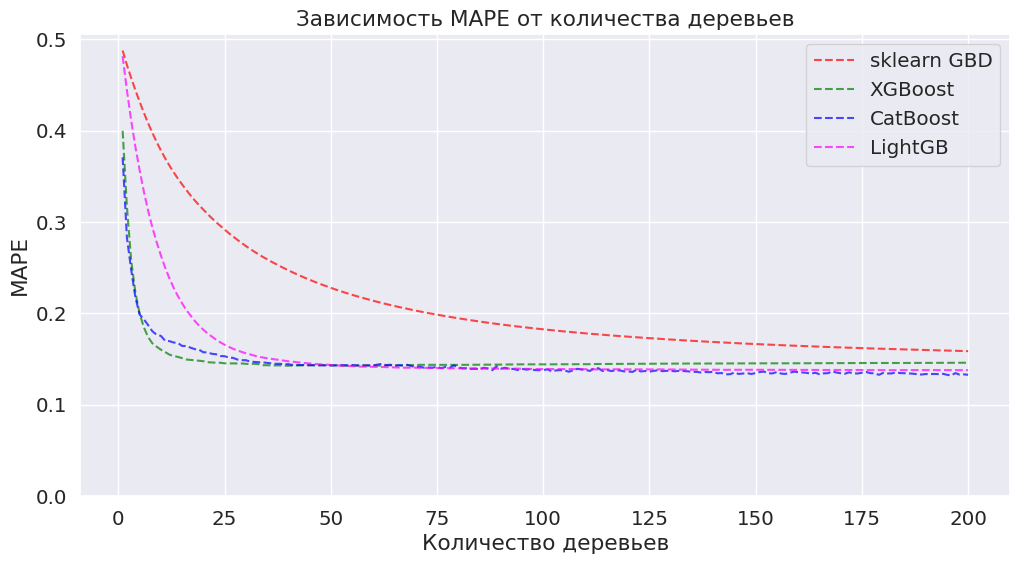

In [8]:
xgb_values, catboost_values, lgb_values = train_and_evaluate_models(
    X_train, y_train, X_test, y_test, "n_estimators", n_estimators_grid
)

plot_dependence_test(
    n_estimators_grid,
    [sklearn_gbd_values, xgb_values, catboost_values, lgb_values],
    ["sklearn GBD", "XGBoost", "CatBoost", "LightGB"],
    "MAPE",
    "Зависимость MAPE от количества деревьев",
    "Количество деревьев",
)

Теперь рассмотрим зависимость от глубины

100%|██████████| 9/9 [01:20<00:00,  8.91s/it]


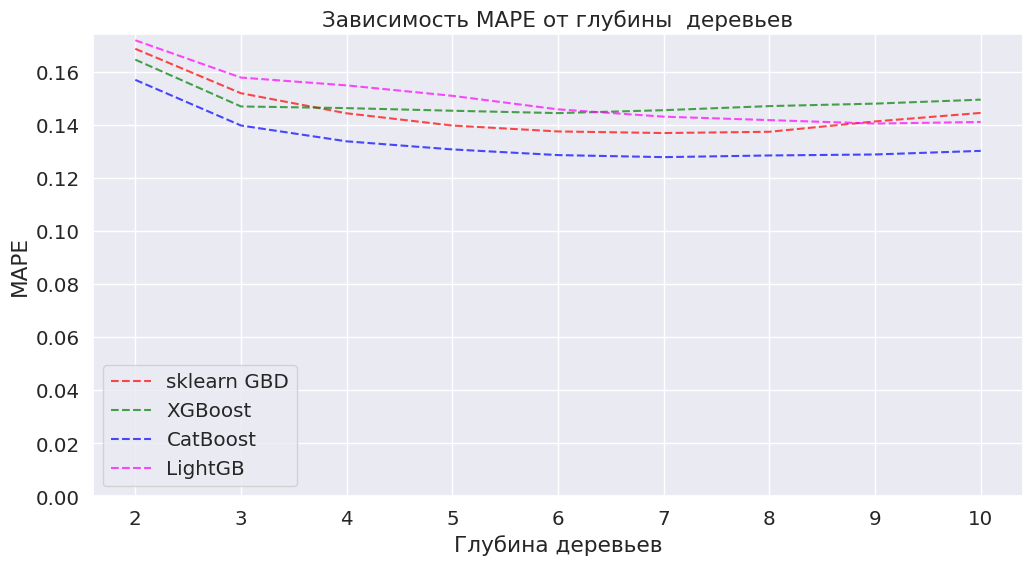

In [9]:
depth_grid = np.arange(2, 11)

xgb_values, catboost_values, lgb_values, sklearn_gbd_values = train_and_evaluate_models(
    X_train, y_train, X_test, y_test, "max_depth", depth_grid, use_sklearn_gb=True
)

plot_dependence_test(
    depth_grid,
    [sklearn_gbd_values, xgb_values, catboost_values, lgb_values],
    ["sklearn GBD", "XGBoost", "CatBoost", "LightGB"],
    "MAPE",
    "Зависимость MAPE от глубины  деревьев",
    "Глубина деревьев",
)

In [10]:
lr_grid = np.logspace(-3, 0, 10)

xgb_values, catboost_values, lgb_values, sklearn_gbd_values = train_and_evaluate_models(
    X_train, y_train, X_test, y_test, "learning_rate", lr_grid, use_sklearn_gb=True
)

100%|██████████| 10/10 [00:49<00:00,  4.94s/it]


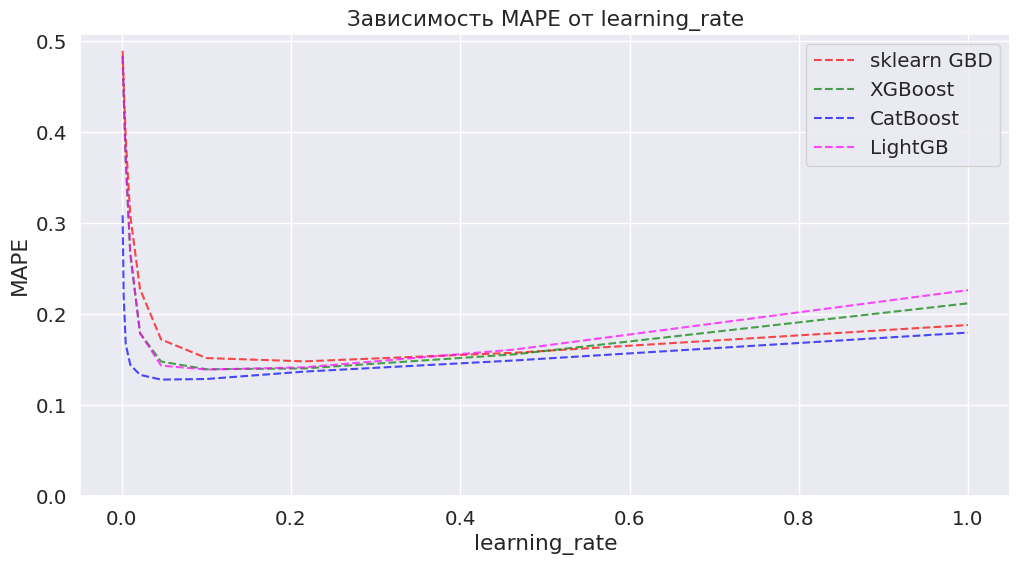

In [11]:
plot_dependence_test(
    lr_grid,
    [sklearn_gbd_values, xgb_values, catboost_values, lgb_values],
    ["sklearn GBD", "XGBoost", "CatBoost", "LightGB"],
    "MAPE",
    "Зависимость MAPE от learning_rate",
    "learning_rate",
)

Проверим зависимость от $l_1$ и $l_2$ регуляризации. Заметим, в `sklearn.GradientBoostingRegressor` нет таких параметров.

В `CatBoost` не параметра отвечающего за l1 регуляризацию.

In [12]:
alpha_grid = np.logspace(-4, 0, num=10)

xgb_values_l1 = []
lgb_values_l1 = []

for param_value in tqdm(alpha_grid):
    xgb_model = xgb.XGBRegressor(alpha=param_value)
    xgb_model.fit(X_train, y_train)
    predictions_xgb = xgb_model.predict(X_test)

    lgb_model = lgb.LGBMRegressor(alpha=param_value, verbose=-1)
    lgb_model.fit(X_train, y_train)
    predictions_lgb = lgb_model.predict(X_test)

    xgb_values_l1.append(mape(y_test, predictions_xgb))
    lgb_values_l1.append(mape(y_test, predictions_lgb))

100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


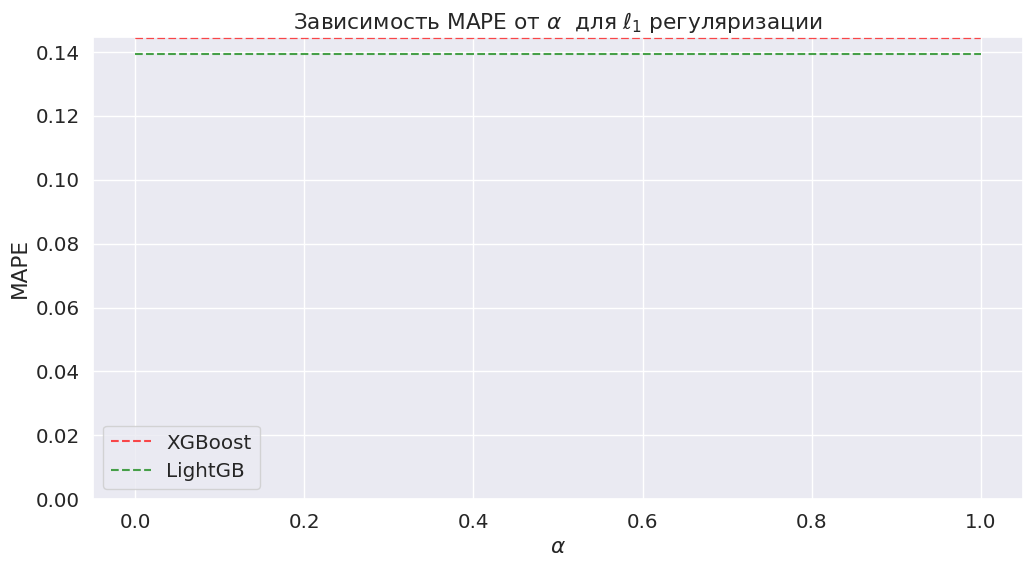

In [13]:
plot_dependence_test(
    alpha_grid,
    [xgb_values_l1, lgb_values_l1],
    ["XGBoost", "LightGB"],
    "MAPE",
    r"Зависимость MAPE от $\alpha$  для $\ell_1$ регуляризации",
    r"$\alpha$",
)

In [14]:
alpha_grid = np.logspace(-4, 0, num=10)
alpha_grid = np.logspace(-4, 0, num=10)

xgb_values_l2 = []
catboost_values_l2 = []
lgb_values_l2 = []

for param_value in tqdm(alpha_grid):
    xgb_model = xgb.XGBRegressor(reg_lambda=param_value)
    xgb_model.fit(X_train, y_train)
    predictions_xgb = xgb_model.predict(X_test)

    catboost_model = CatBoostRegressor(reg_lambda=param_value, verbose=False)
    catboost_model.fit(X_train, y_train)
    predictions_catboost = catboost_model.predict(X_test)

    lgb_model = lgb.LGBMRegressor(reg_lambda=param_value, verbose=-1)
    lgb_model.fit(X_train, y_train)
    predictions_lgb = lgb_model.predict(X_test)

    xgb_values_l2.append(mape(y_test, predictions_xgb))
    catboost_values_l2.append(mape(y_test, predictions_catboost))
    lgb_values_l2.append(mape(y_test, predictions_lgb))

100%|██████████| 10/10 [00:37<00:00,  3.72s/it]


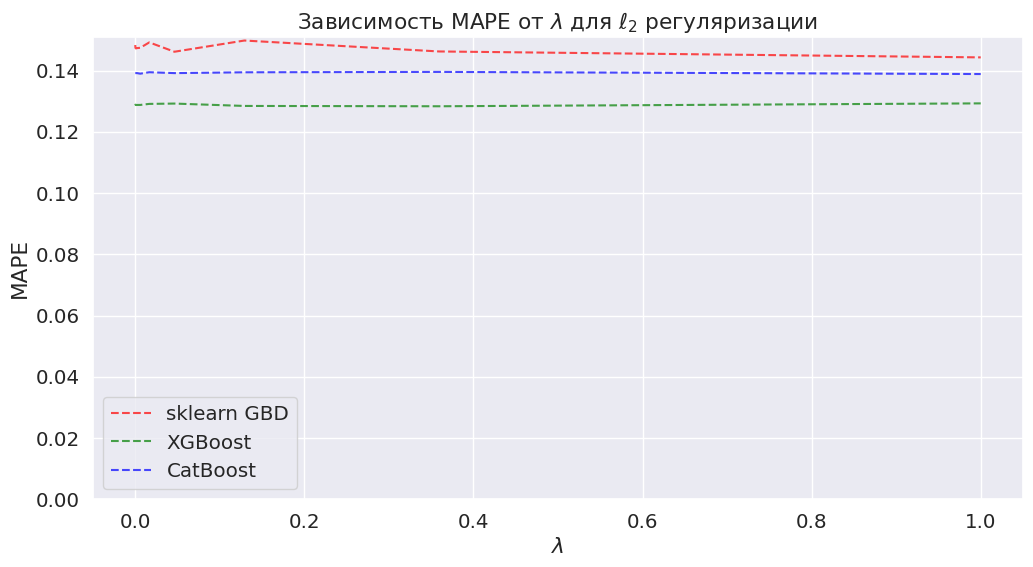

In [15]:
plot_dependence_test(
    alpha_grid,
    [
        xgb_values_l2,
        catboost_values_l2,
        lgb_values_l2,
    ],
    ["sklearn GBD", "XGBoost", "CatBoost", "LightGB"],
    "MAPE",
    r"Зависимость MAPE от $\lambda$ для $\ell_2$ регуляризации",
    r"$\lambda$",
)

**2.** Нарисуйте по несколько деревьев каждой из моделей с помощью функций `show_plot_tree`, которая реализована в каждой из библиотек. Для этого потребуется немного разобраться с тем, как работают эти функции. 

Какие особенности можно заметить? Как меняются деревья при изменении максимальной глубины? Что выдает CatBoost в листе, если в него не попали объекты обучающей выборки?

Будем рисовать по 2 модели каждого вида

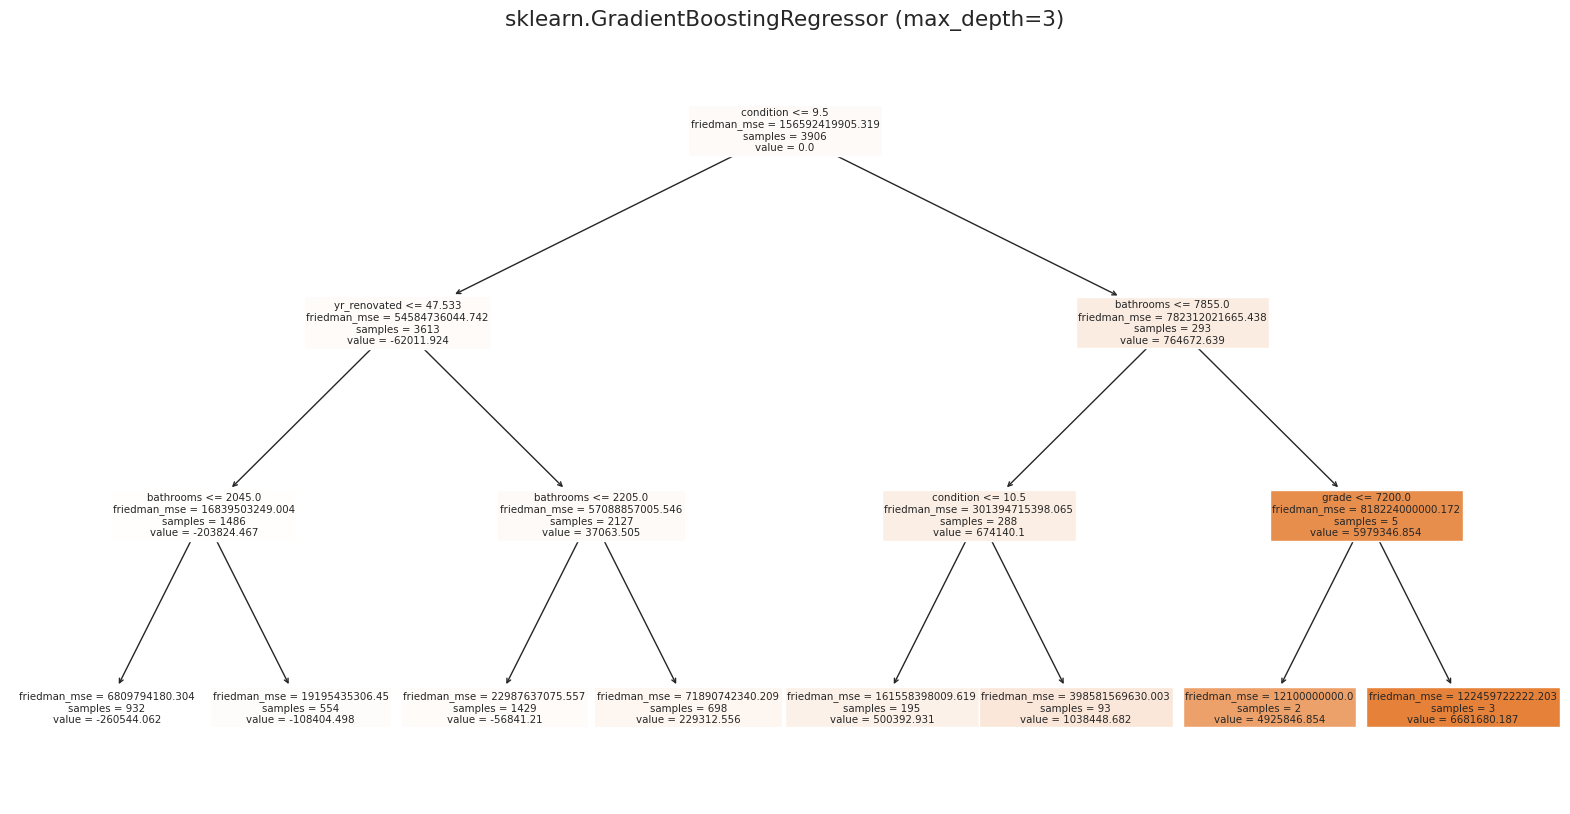

In [16]:
first_sklearn_model = GradientBoostingRegressor(max_depth=3)
second_sklearn_model = GradientBoostingRegressor(max_depth=5)

first_sklearn_model.fit(X_train, y_train)

second_sklearn_model.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(first_sklearn_model.estimators_[0, 0], filled=True, feature_names=data_train.columns)
plt.title("sklearn.GradientBoostingRegressor (max_depth=3)")
plt.show()

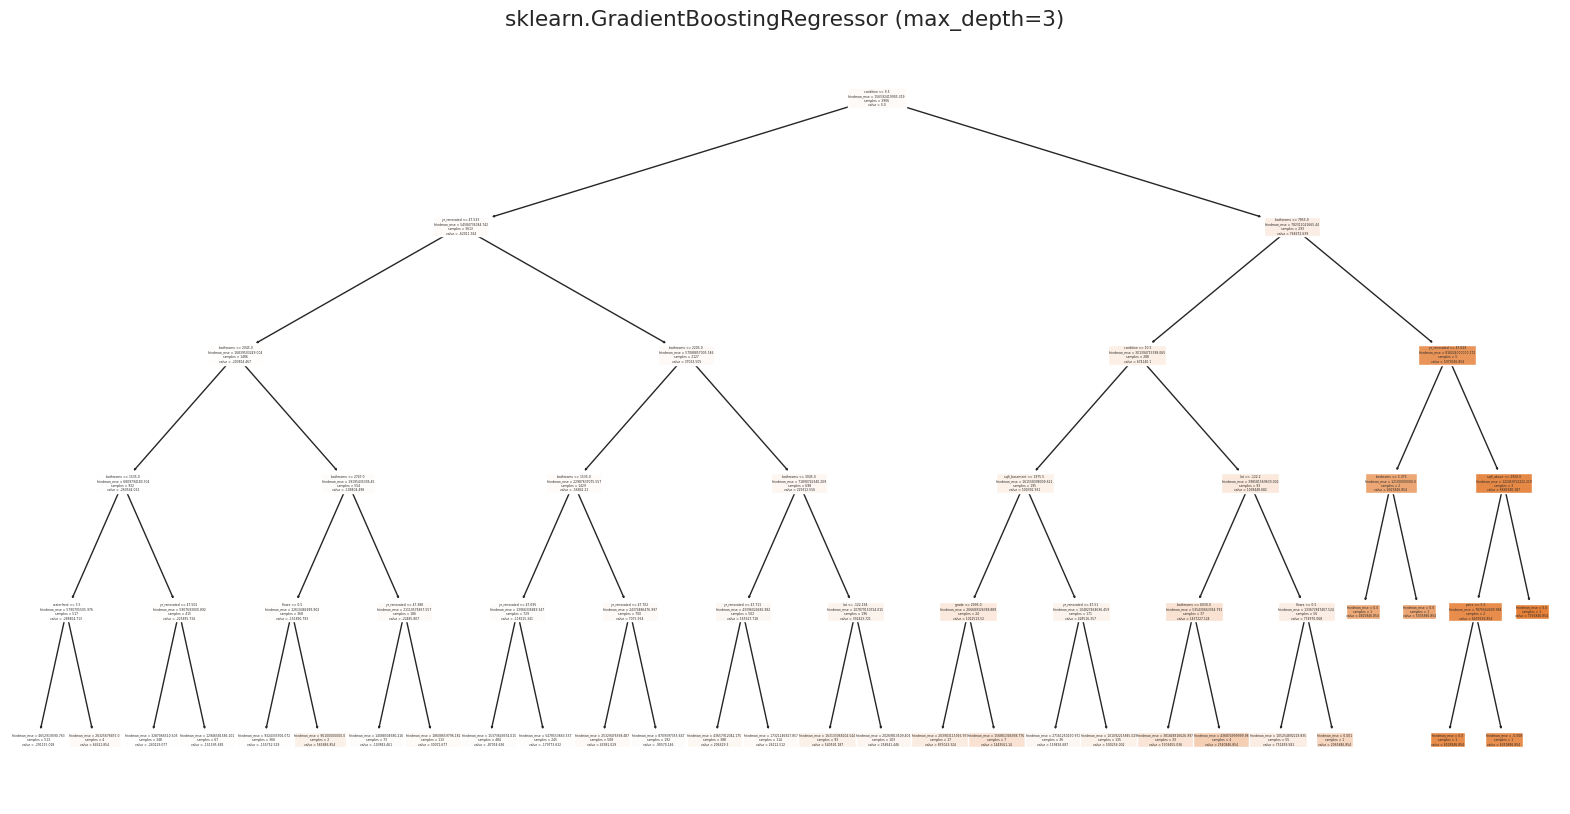

In [17]:
plt.figure(figsize=(20, 10))
plot_tree(second_sklearn_model.estimators_[0, 0], filled=True, feature_names=data_train.columns)
plt.title("sklearn.GradientBoostingRegressor (max_depth=3)")
plt.show()

In [18]:
first_xgb_model = xgb.XGBRegressor(max_depth=3)
second_xgb_model = xgb.XGBRegressor(max_depth=5)

first_xgb_model.fit(X_train, y_train)
second_xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Figure size 2000x1000 with 0 Axes>

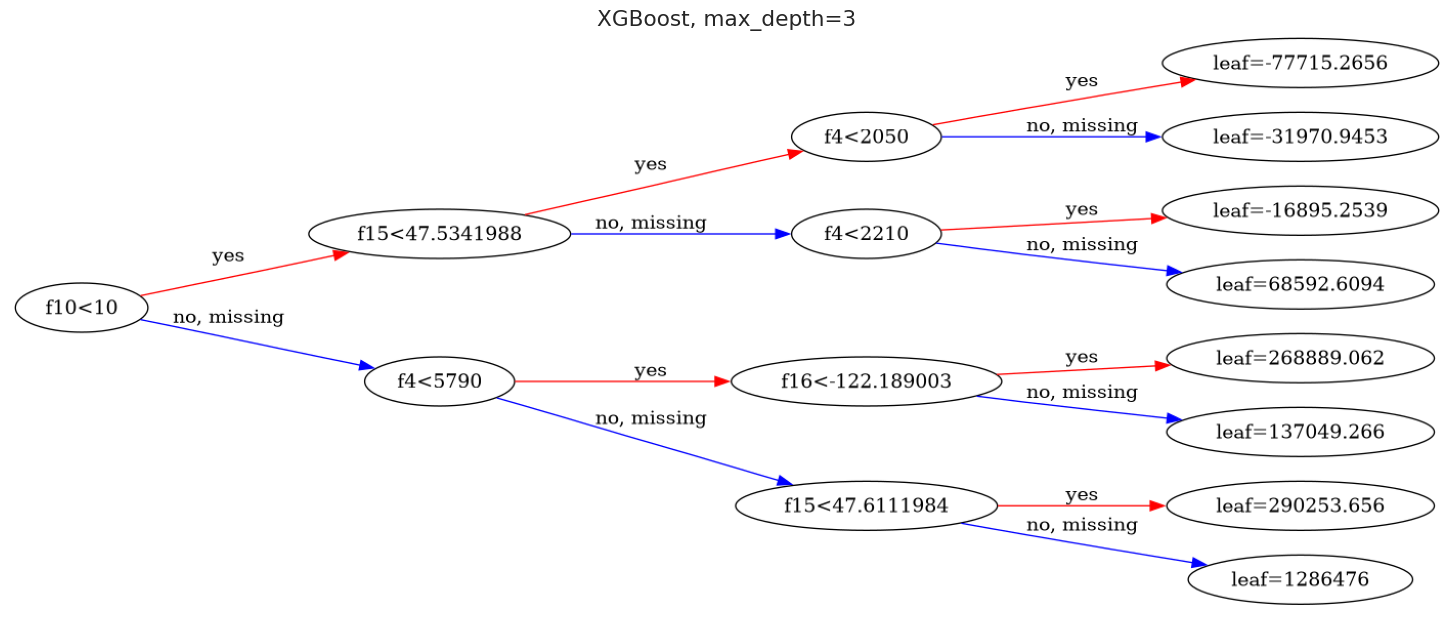

<Figure size 2000x1000 with 0 Axes>

In [22]:
def show_plot_tree(model, title, num_tree=0, size=(18.5, 10.5)):
    plt.figure(figsize=(20, 10))
    xgb.plot_tree(model, num_trees=num_tree, rankdir="LR")
    plt.title(title)

    plt.gcf().set_size_inches(size)
    plt.show()


show_plot_tree(first_xgb_model, "XGBoost, max_depth=3")
show_plot_tree(second_xgb_model, "XGBoost, max_depth=5", size=(150, 100))

В XGBoost видим, что с увеличением глубины, деревья начинают иметь не постоянную глубину.

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


<Figure size 2000x1000 with 0 Axes>

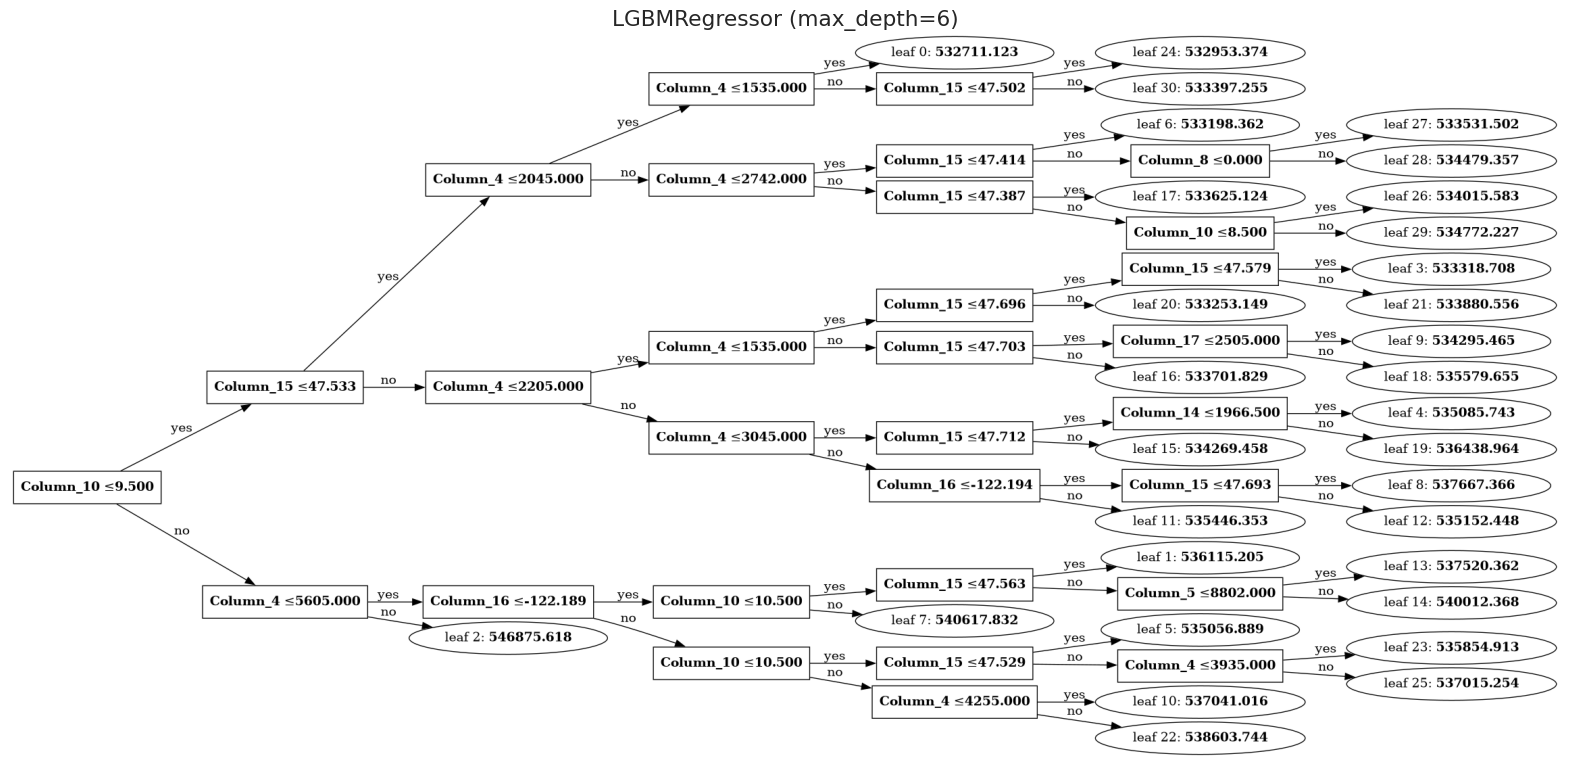

<Figure size 2000x1000 with 0 Axes>

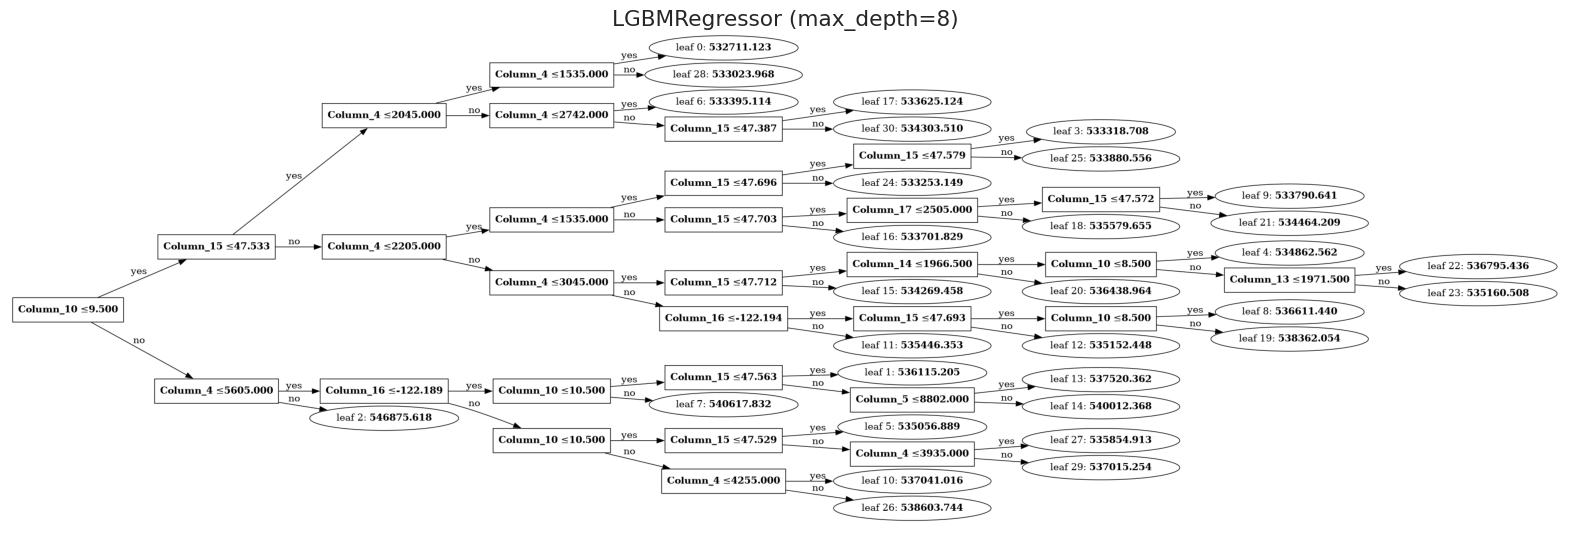

In [27]:
first_lgb_model = lgb.LGBMRegressor(max_depth=6, learning_rate=0.005, verbose=0)
second_lgb_model = lgb.LGBMRegressor(max_depth=8, learning_rate=0.005, verbose=0)

first_lgb_model.fit(X_train, y_train)
second_lgb_model.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
lgb.plot_tree(first_lgb_model, tree_index=0, figsize=(20, 10))
plt.title("LGBMRegressor (max_depth=6)")
plt.show()

plt.figure(figsize=(20, 10))
lgb.plot_tree(second_lgb_model, tree_index=0, figsize=(20, 10))
plt.title("LGBMRegressor (max_depth=8)")
plt.show()

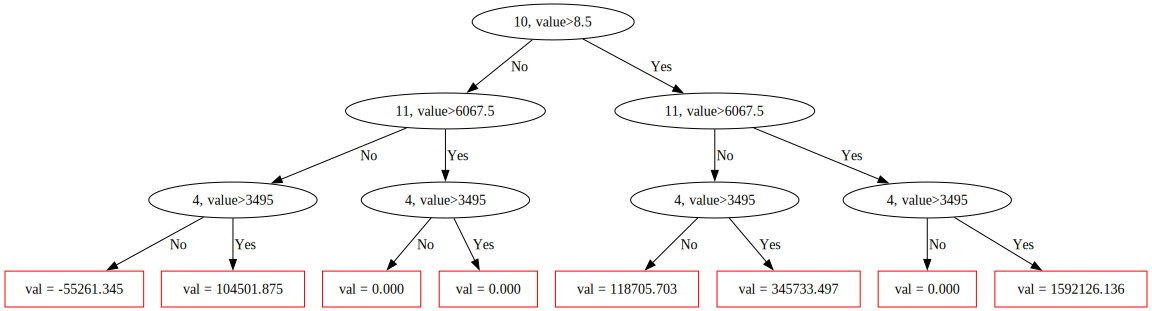

In [29]:
def catboost_plot_tree(model, title, tree_idx=0, pool=None, size=(12, 8)):
    """
    Функция для построения дерева из модели CatBoost с изменяемым размером графика.

    Parameters:
    - model: объект CatBoost, обученная модель
    - title: str, название графика
    - tree_idx: int, индекс дерева (по умолчанию 0)
    - pool: Pool, если используется, иначе None (нужен для указания признаков)
    - size: tuple, размер графика (по умолчанию (12, 8))
    """
    plt.figure(figsize=size)
    plt.title(title)
    model.show_plot_tree(tree_idx=tree_idx, pool=pool)
    plt.show()


first_cat_model = CatBoostRegressor(depth=3, verbose=0, iterations=1)
second_cat_model = CatBoostRegressor(depth=5, verbose=0)

first_cat_model.fit(X_train, y_train)
second_cat_model.fit(X_train, y_train)

first_cat_model.plot_tree(tree_idx=0)

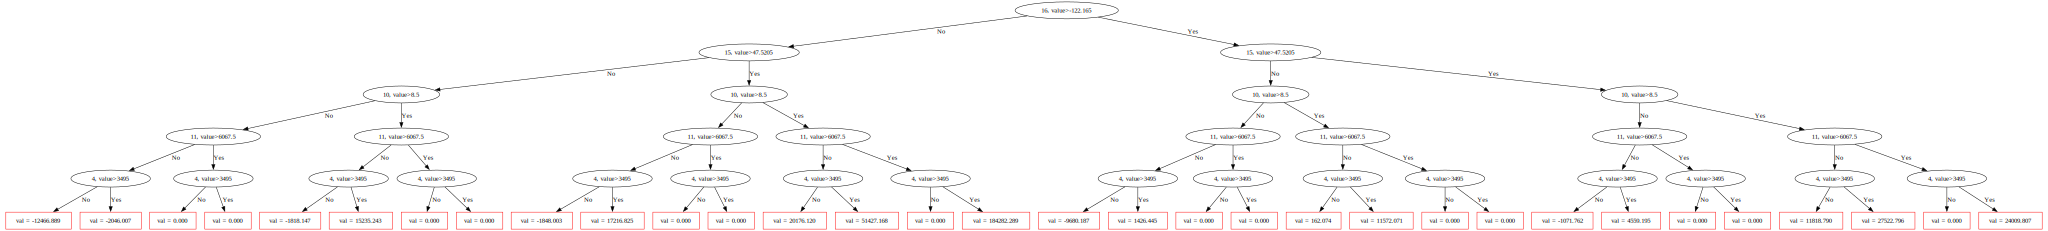

In [30]:
second_cat_model.plot_tree(tree_idx=0)

Как видим, с увеличением максимальной глубины, не все ветви деревьев ее имеют.

CatBooost в листьях без значений оставляет значение 0.

**3.** Исследуйте среднее время обучения и предсказания для разных моделей. Для более честного сравнения для каждой модели стоит использовать те значения гиперпараметров, которые для нее оптимальны.

In [31]:
param_dist = {
    "n_estimators": [200],
    "max_depth": [7, 9, 12],
    "learning_rate": [0.001, 0.01, 0.05, 0.1],
}


xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=100,  
    scoring="neg_mean_absolute_percentage_error",  # Метрика для оценки
    cv=3,  
    verbose=1,
    random_state=42,
    n_jobs=-1,  
)

xgb_random_search.fit(X_train, y_train)

print("Лучшие параметры:", xgb_random_search.best_params_)
print("Лучшее значение метрики:", -xgb_random_search.best_score_)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Лучшие параметры: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05}
Лучшее значение метрики: 0.14358293949358222


In [43]:
lgb_model = lgb.LGBMRegressor(verbose=-1, n_estimators=200)

param_grid = {
    "max_depth": [7, 9, 12],
    "learning_rate": [0.0001, 0.001, 0.005],
}

lgb_grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    n_jobs=1,
    scoring='neg_mean_absolute_percentage_error',
    cv=5
)

lgb_grid_search.fit(X_train, y_train)

print("Лучшие параметры для LightGBM:", lgb_grid_search.best_params_)
print("Лучшее значение метрики для LightGBM:", -lgb_grid_search.best_score_)

Лучшие параметры для LightGBM: {'learning_rate': 0.005, 'max_depth': 7}
Лучшее значение метрики для LightGBM: 0.27319540613309556


In [44]:
catboost_model = CatBoostRegressor(verbose=0)

param_dist_catboost = {
    "n_estimators": [200],
    "max_depth": [5, 7, 9],
    "learning_rate": [0.001, 0.01, 0.05, 0.1],
}


catboost_random_search = RandomizedSearchCV(
    estimator=catboost_model,
    param_distributions=param_dist_catboost,
    n_iter=100,
    scoring="neg_mean_absolute_percentage_error",  
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1,
)

catboost_random_search.fit(X_train, y_train)

print("Лучшие параметры для CatBoost:", catboost_random_search.best_params_)
print("Лучшее значение метрики для CatBoost:", -catboost_random_search.best_score_)


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Лучшие параметры для CatBoost: {'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.1}
Лучшее значение метрики для CatBoost: 0.14089522529372334


In [45]:
gdb_model = GradientBoostingRegressor()

param_dist_gdb = {
    "n_estimators": [200],
    "max_depth": [5, 7, 9],
    "learning_rate": [0.001, 0.01, 0.05, 0.1],
}

gdb_random_search = RandomizedSearchCV(
    estimator=gdb_model,
    param_distributions=param_dist_gdb,
    n_iter=100,
    scoring="neg_mean_absolute_percentage_error", 
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1,
)

gdb_random_search.fit(X_train, y_train)

print("Лучшие параметры для Gradient Boosting:", gdb_random_search.best_params_)
print("Лучшее значение метрики для Gradient Boosting:", -gdb_random_search.best_score_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Лучшие параметры для Gradient Boosting: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05}
Лучшее значение метрики для Gradient Boosting: 0.1418676649691051


In [47]:
time_xgb_train = []
time_lgb_train = []
time_catboost_train = []
time_sklearn_train = []
num_iter = 10

for _ in tqdm(range(num_iter)):
    xgb_model = xgb.XGBRegressor(**xgb_random_search.best_params_)
    xgb_start = time()
    xgb_model.fit(X_train, y_train)
    time_xgb_train.append(time() - xgb_start)

    lgb_model = lgb.LGBMRegressor(**lgb_grid_search.best_params_, verbose=-1)
    lgb_start = time()
    lgb_model.fit(X_train, y_train)
    time_lgb_train.append(time() - lgb_start)

    catboost_model = CatBoostRegressor(**catboost_random_search.best_params_, verbose=0)
    catboost_start = time()
    catboost_model.fit(X_train, y_train)
    time_catboost_train.append(time() - catboost_start)

    gdb_model = GradientBoostingRegressor(**gdb_random_search.best_params_)
    gdb_start = time()
    gdb_model.fit(X_train, y_train)
    time_sklearn_train.append(time() - gdb_start)

print(f"Среднее время обучения XGBRegressor: { np.mean(time_xgb_train):.2f} сек")
print(f"Среднее время обучения LightGBM:{np.mean(time_lgb_train):.2f} сек")
print(f"Среднее время обучения CatBoost:{np.mean(time_catboost_train):.2f} сек" )
print(f"Среднее время обучения Gradient Boosting: {np.mean(time_sklearn_train):.2f} сек" )

100%|██████████| 10/10 [01:30<00:00,  9.04s/it]

Среднее время обучения XGBRegressor: 0.96 сек
Среднее время обучения LightGBM:0.22 сек
Среднее время обучения CatBoost:2.21 сек
Среднее время обучения Gradient Boosting: 5.64 сек


In [49]:
time_xgb_predict = []
time_lgb_predict = []
time_catboost_predict = []
time_sklearn_predict = []

xgb_model = xgb.XGBRegressor(**xgb_random_search.best_params_)
xgb_model.fit(X_train, y_train)

lgb_model = lgb.LGBMRegressor(**lgb_grid_search.best_params_, verbose=-1)
lgb_model.fit(X_train, y_train)

catboost_model = CatBoostRegressor(**catboost_random_search.best_params_, verbose=0)
catboost_model.fit(X_train, y_train)

gdb_model = GradientBoostingRegressor(**gdb_random_search.best_params_)
gdb_model.fit(X_train, y_train)


for x in tqdm(X_test):
    xgb_start = time()
    xgb_model.predict([x])
    time_xgb_predict.append(time() - xgb_start)

    lgb_start = time()
    lgb_model.predict([x])  
    time_lgb_predict.append(time() - lgb_start)

    catboost_start = time()
    catboost_model.predict([x])  
    time_catboost_predict.append(time() - catboost_start)

    gdb_start = time()
    gdb_model.predict([x]) 
    time_sklearn_predict.append(time() - gdb_start)

print(f"Среднее время предсказания XGBRegressor: {1000 * np.mean(time_xgb_predict):.4f} мс")
print(f"Среднее время предсказания LightGBM: {1000 *np.mean(time_lgb_predict):.4f} мс")
print(f"Среднее время предсказания CatBoost: {1000 *np.mean(time_catboost_predict):.4f} мс")
print(f"Среднее время предсказания Gradient Boosting: {1000 *np.mean(time_sklearn_predict):.4f} мс")
 

100%|██████████| 11720/11720 [00:31<00:00, 377.01it/s]

Среднее время предсказания XGBRegressor: 0.4888 мс
Среднее время предсказания LightGBM: 0.8321 мс
Среднее время предсказания CatBoost: 0.8372 мс
Среднее время предсказания Gradient Boosting: 0.4577 мс


**Выводы:**

В работе мы исследовали разные стороны различных реализаций градиентного бустинга, подведем итоги:

* У всех моделей с увеличением числа деревьев увеличивается качество, при этом не наблюдалось переобучения

* Качество из за измененения глубины и параметра обучения меняется от 2% от 10%.

* $\ell_1$ и $\ell_2$ никак не повлияло на качество моделей.

* Можно заметить, при увеличении глубины, деревья в бустинге начинают быть не полными.

* Реализация в sklearn медленее, XGBoost и Catboost почти в два раза, и при том проигрывает обоим в точности. Модель LightGB хоть и обучается быстрее в 4 раза, но не дает значительного выигрыша.

* Заметим, что время предсказания XGBoost оказалось в 18 раз больше чем у CatBoost и реализации sklearn.

Подводя итог, можно сделать вывод, что учитывание гладкости в формуле бустинга явно дает нам выигрыш по точности, что делает XGBoost и прочие реализации на его основе более привлекательными чем обычный бустинг.